## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


## Load the Dataset

In [2]:
df = pd.read_excel('Dots Potential Customer Survey Data.xlsx')

In [3]:
df.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [4]:
df.tail()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
3215,4936093,KOR,78,15861,Female,2,3,1,5,8,...,0,2,1,0,0,1,1,0,0,1
3216,3458615,KOR,78,24510,Male,6,1,1,11,8,...,1,5,0,0,0,1,1,1,0,0
3217,7651095,KOR,78,6716,Male,9,1,1,9,7,...,1,4,1,0,0,0,1,1,0,1
3218,7490009,KOR,78,37569,Male,1,3,-1,7,8,...,0,3,1,1,0,0,0,1,0,0
3219,9367449,KOR,78,17534,Male,9,2,3,8,7,...,0,1,1,0,1,0,1,1,1,1


## Descriptive Statistics: Used df.describe() to obtain a summary of the numerical features, providing insights into the distribution and central tendencies of the data.

In [5]:
df.describe()

,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,4.988139e+06,44.834161,20578.639130,4.347205,1.991925,1.700621,8.162733,7.648447,106.011801,0.334783,...,0.706211,4.450932,0.607764,0.584783,0.247826,0.450932,0.568944,0.606522,0.310870,0.548137
std,2.867911e+06,19.073161,15079.429422,2.807803,1.205222,1.190910,2.759419,2.260047,15.414674,0.471988,...,0.455567,2.454004,0.488325,0.492836,0.431817,0.497664,0.495301,0.488597,0.462921,0.497755
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,-1.000000,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516499e+06,29.000000,8494.000000,2.000000,1.000000,1.000000,6.000000,6.000000,95.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.041256e+06,44.000000,16982.000000,4.000000,2.000000,2.000000,8.000000,8.000000,106.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.459871e+06,60.000000,30965.250000,6.000000,3.000000,3.000000,10.000000,9.000000,116.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,18.000000,17.000000,161.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

##  Identify and Handle Missing Values, Outliers, and Inconsistencies

### Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the median (for numerical features)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values with the mode (for categorical features)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

Missing values in each column:
 Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorce

### Outliers

In [7]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers in each numerical column:\n", outliers)

Number of outliers in each numerical column:
 Unique ID                                                   0
Age                                                         0
Annual Family Income ($)                                    0
Time spent watching videos/TV                               0
Time spent playing indoor sports                            0
Time spent playing outdoor sports                           0
Total Time spent working in front of screen                 6
Sleeping hours                                             11
IQ                                                          6
Whether parents have specs                                  0
English speaker                                             0
Migrated within country                                     0
Migrated overseas                                           0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)     0
Has Diabetes                                                0
Has Gym Subscription    

In [8]:
print(df.columns)

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')


### I used boxplot to visualize the outliers.

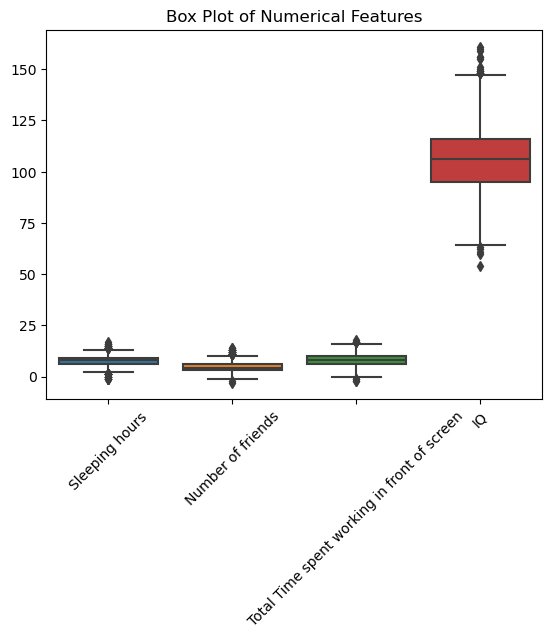

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for numerical features
sns.boxplot(data=df[['Sleeping hours', 'Number of friends', 'Total Time spent working in front of screen', 'IQ']])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Features')
plt.show()


### Removing Outliers

In [10]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(df[['Total Time spent working in front of screen', 'Sleeping hours', 'IQ', 'Number of friends']])

# Filter out outliers (z-score > 3 or < -3)
df_no_outliers_z = df[(abs(z_scores) < 3).all(axis=1)]

print(f"Shape of dataframe before removing outliers: {df.shape}")
print(f"Shape of dataframe after removing outliers: {df_no_outliers_z.shape}")


Shape of dataframe before removing outliers: (3220, 29)
Shape of dataframe after removing outliers: (3158, 29)


### Plotting Boxplots Without Outliers

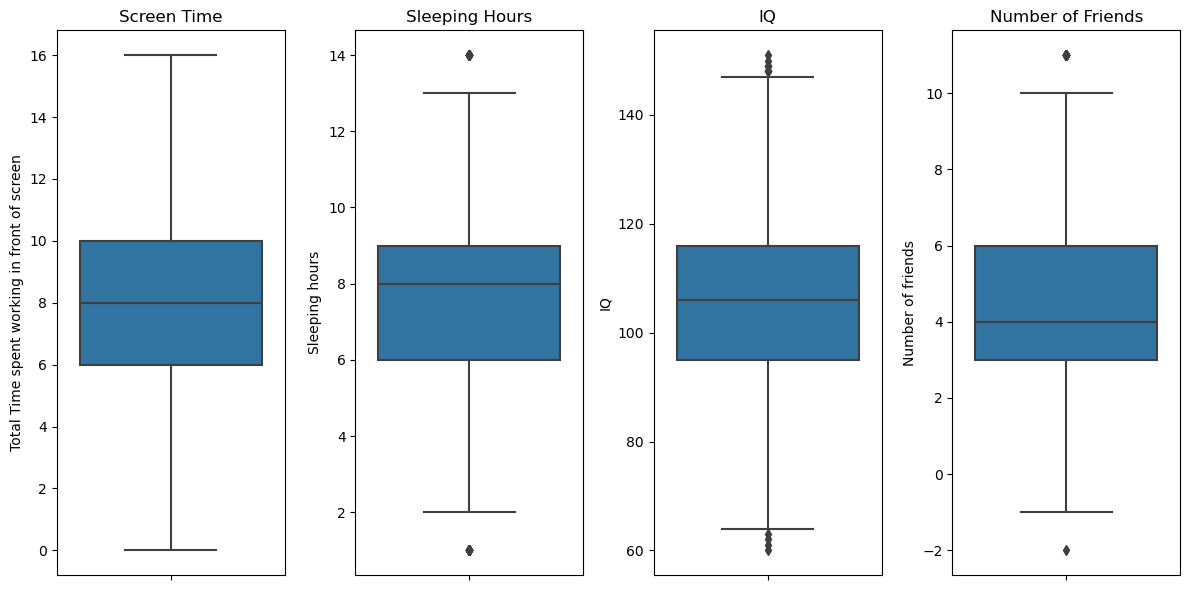

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y=df_no_outliers_z['Total Time spent working in front of screen'])
plt.title('Screen Time')

plt.subplot(1, 4, 2)
sns.boxplot(y=df_no_outliers_z['Sleeping hours'])
plt.title('Sleeping Hours')

plt.subplot(1, 4, 3)
sns.boxplot(y=df_no_outliers_z['IQ'])
plt.title('IQ')

plt.subplot(1, 4, 4)
sns.boxplot(y=df_no_outliers_z['Number of friends'])
plt.title('Number of Friends')

plt.tight_layout()
plt.show()


### Inconsistencies

In [12]:
# Check unique values in categorical features
print("Unique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)':", df['Maritial Status (0 - Single, 1 - Married, 2 - Divorced)'].unique())


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)': [0 1 2]


# Explore the Data

### Summary Statistics

In [13]:
# Convert specific columns to 'category'
categorical_columns = ['Gender', 'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)', 'English speaker', 'Wear Specs']  # Add other categorical columns as needed

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Describe categorical features
print(df.describe(include=['category']))


       Gender  English speaker  \
count    3220             3220   
unique      2                2   
top      Male                1   
freq     1972             2101   

        Maritial Status (0 - Single, 1 - Married, 2 - Divorced)  Wear Specs  
count                                                3220              3220  
unique                                                  3                 2  
top                                                     1                 1  
freq                                                 1652              1765  


In [14]:
# Summary statistics for numerical features
print(df.describe())

# Summary statistics for categorical features
print(df.describe(include=['object', 'category']))


          Unique ID          Age  Annual Family Income ($)  \
count  3.220000e+03  3220.000000               3220.000000   
mean   4.988139e+06    44.834161              20578.639130   
std    2.867911e+06    19.073161              15079.429422   
min    1.683000e+03    13.000000                 10.000000   
25%    2.516499e+06    29.000000               8494.000000   
50%    5.041256e+06    44.000000              16982.000000   
75%    7.459871e+06    60.000000              30965.250000   
max    9.999011e+06    91.000000              59858.000000   

       Time spent watching videos/TV  Time spent playing indoor sports  \
count                    3220.000000                       3220.000000   
mean                        4.347205                          1.991925   
std                         2.807803                          1.205222   
min                         0.000000                          0.000000   
25%                         2.000000                          1.000000 

### Data Types and Value Ranges

In [15]:
print(df.dtypes)
print(df[['Age', 'Annual Family Income ($)', 'Total Time spent working in front of screen']].describe())


Unique ID                                                     int64
Country                                                      object
Age                                                           int64
Annual Family Income ($)                                      int64
Gender                                                     category
Time spent watching videos/TV                                 int64
Time spent playing indoor sports                              int64
Time spent playing outdoor sports                             int64
Total Time spent working in front of screen                   int64
Sleeping hours                                                int64
IQ                                                            int64
Whether parents have specs                                    int64
English speaker                                            category
Migrated within country                                       int64
Migrated overseas                               

### Distribution of Features

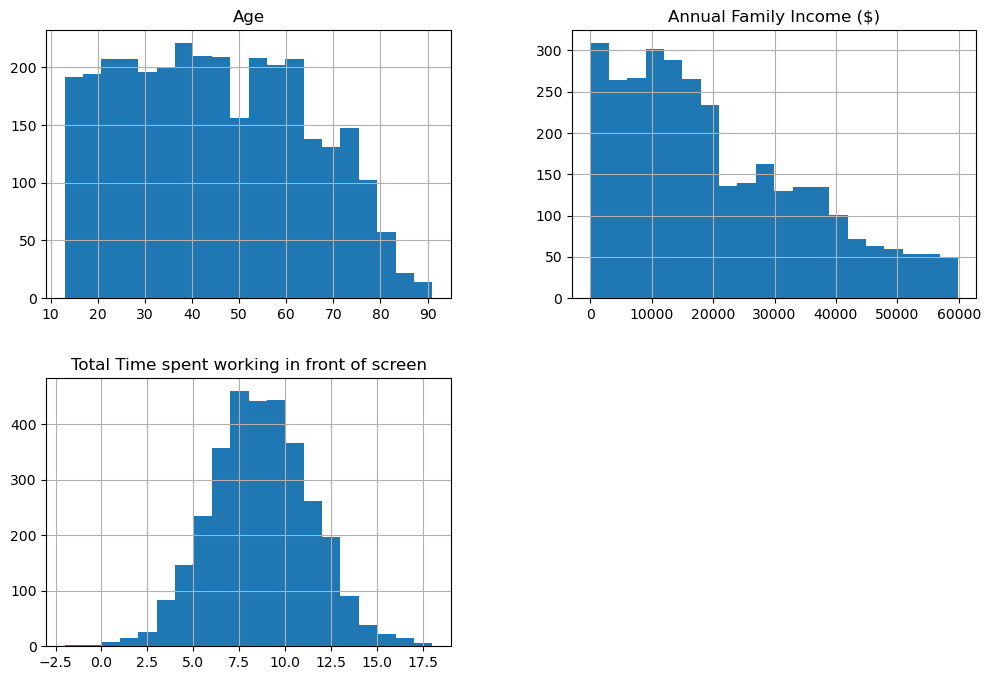

C:\Users\Deviare User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


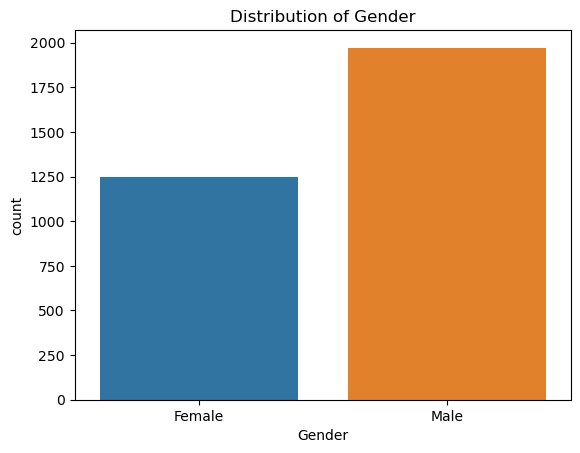

C:\Users\Deviare User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


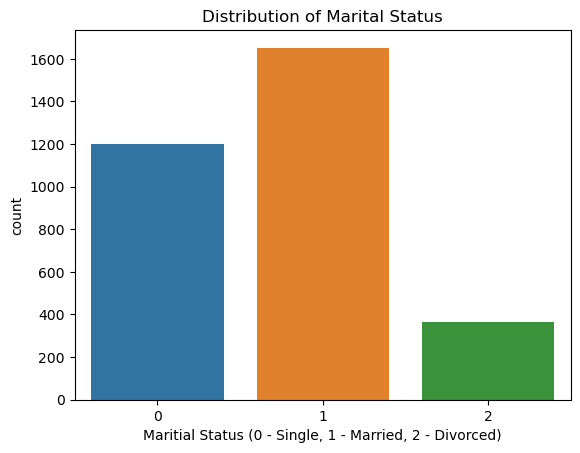

In [18]:
# Histograms for numerical features
df[['Age', 'Annual Family Income ($)', 'Total Time spent working in front of screen']].hist(bins=20, figsize=(12, 8))
plt.show()

# Bar plots for categorical features
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

sns.countplot(x='Maritial Status (0 - Single, 1 - Married, 2 - Divorced)', data=df)
plt.title('Distribution of Marital Status')
plt.show()


# Exploratory Data Analysis (EDA)

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Columns in DataFrame:", df.columns)

# List of numerical features
numerical_features = ['Age', 'Annual Family Income ($)', 'IQ', 'Sleeping hours', 'Total Time spent working in front of screen']

# Check which of these features are in the DataFrame
existing_features = [feature for feature in numerical_features if feature in df.columns]
print("Existing numerical features:", existing_features)

# Handle missing values
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert categorical columns to lowercase (if needed)
df['Gender'] = df['Gender'].astype(str).str.lower()

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Convert categorical columns to numeric
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Country'] = label_enc.fit_transform(df['Country'])

# Creating new features (if needed)
df['Total_Time_Sports'] = df['Time spent playing indoor sports'] + df['Time spent playing outdoor sports']

# Convert categorical variables to numerical (e.g., one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features (if needed)
scaler = StandardScaler()
if existing_features:  # Check if there are any numerical features to scale
    df[existing_features] = scaler.fit_transform(df[existing_features])

# Display the DataFrame info
print(df.info())


Columns in DataFrame: Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'Migrated within country',
       'Migrated overseas', 'Has Diabetes', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Total_Time_Sports', 'English speaker_1',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)_1',
       'Education Status_Graduate', 'Education Status_Studying',
       'Wear Specs_1'],
      dtype='object')
Existing numerical features: ['Age', 'Annual Family Income ($)', 'IQ', 'Sleeping hours', 'Total Time spent working in front of screen']
<class 'pandas.core.frame.DataFra

In [45]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for column in non_numeric_cols:
    df[column] = label_enc.fit_transform(df[column].astype(str))

print(df.dtypes)

Non-numeric columns: Index([], dtype='object')
Unique ID                                                      int64
Country                                                        int64
Age                                                          float64
Annual Family Income ($)                                     float64
Gender                                                         int32
Time spent watching videos/TV                                  int64
Time spent playing indoor sports                               int64
Time spent playing outdoor sports                              int64
Total Time spent working in front of screen                  float64
Sleeping hours                                               float64
IQ                                                           float64
Whether parents have specs                                     int64
Migrated within country                                        int64
Migrated overseas                                       

In [46]:
from sklearn.preprocessing import LabelEncoder

# Ensure categorical columns are of type str
df['Gender'] = df['Gender'].astype(str)
df['Country'] = df['Country'].astype(str)

# Convert categorical columns to lowercase
df['Gender'] = df['Gender'].str.lower()

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Convert categorical columns to numeric
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Country'] = label_enc.fit_transform(df['Country'])

## Histogram Plotting distributions of key numerical variables

C:\Users\Deviare User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


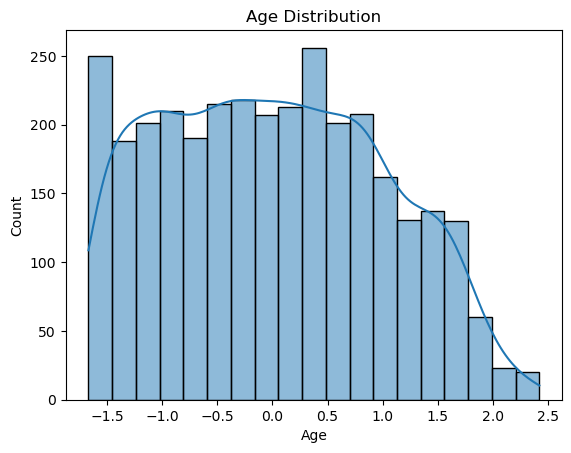

In [47]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Correlation Matrix: Created a heatmap of the correlation matrix using only numeric columns. This visualization helped identify relationships between numerical features, although there were issues due to non-numeric columns.

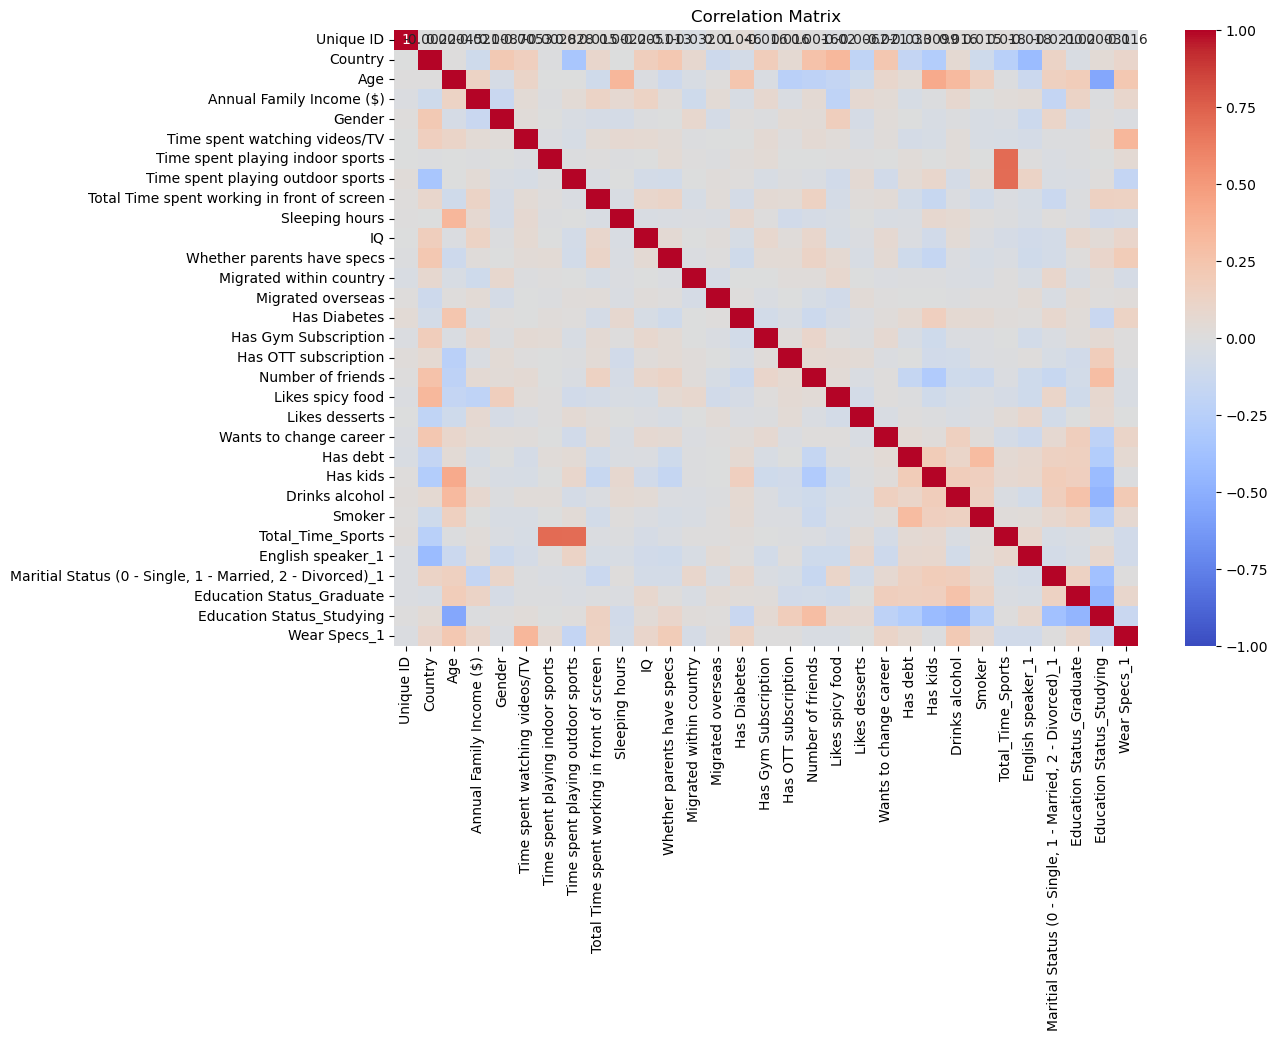

In [48]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Boxplot Analysis: Generated a boxplot to analyze the relationship between age and the likelihood of wearing glasses, revealing insights into how age correlates with the target variable.

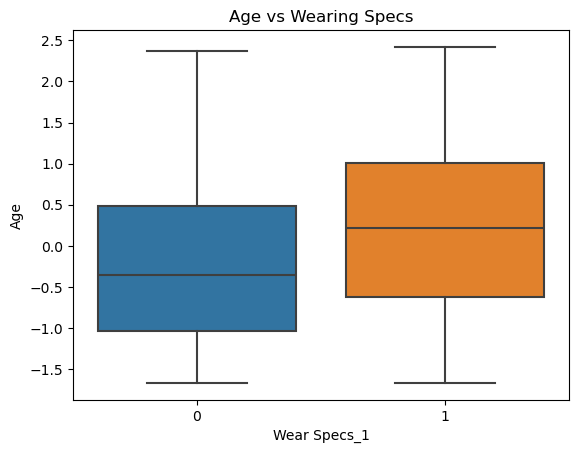

In [49]:
sns.boxplot(x='Wear Specs_1', y='Age', data=df)
plt.title('Age vs Wearing Specs')
plt.show()

# Feature Engineering

In [50]:
numerical_features = [
    'Age',
    'Annual Family Income ($)',
    'IQ',
    'Sleeping hours',
    'Total Time_Spent Working_in Front of a Screen' 

]

existing_numerical_features = [feature for feature in numerical_features if feature in df.columns]
print(f"Existing numerical features: {existing_numerical_features}")

if existing_numerical_features:
    scaler = StandardScaler()
    df[existing_numerical_features] = scaler.fit_transform(df[existing_numerical_features])

Existing numerical features: ['Age', 'Annual Family Income ($)', 'IQ', 'Sleeping hours']


In [51]:
X = df.drop('Wear Specs_1', axis=1)
y = df['Wear Specs_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Visualization

### The ROC curve, which shows the trade-off between the true positive rate and the false positive rate

Accuracy Score: 0.7567287784679089
Confusion Matrix:
 [[294 131]
 [104 437]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       425
           1       0.77      0.81      0.79       541

    accuracy                           0.76       966
   macro avg       0.75      0.75      0.75       966
weighted avg       0.76      0.76      0.76       966

ROC-AUC Score: 0.8221028596281397


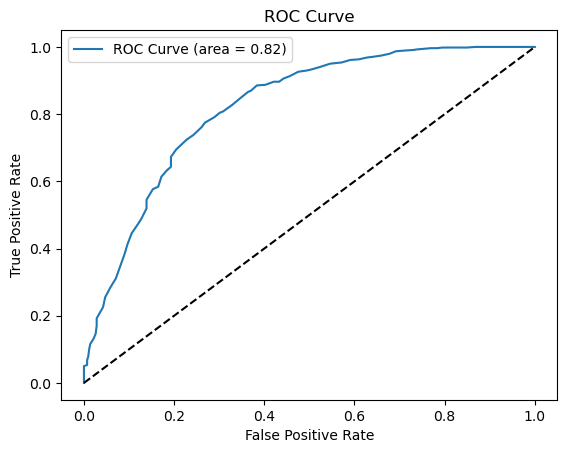

In [52]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model Interpretation

### Feature Importance 
### Analyze feature importance to understand which features have the most impact on the prediction.

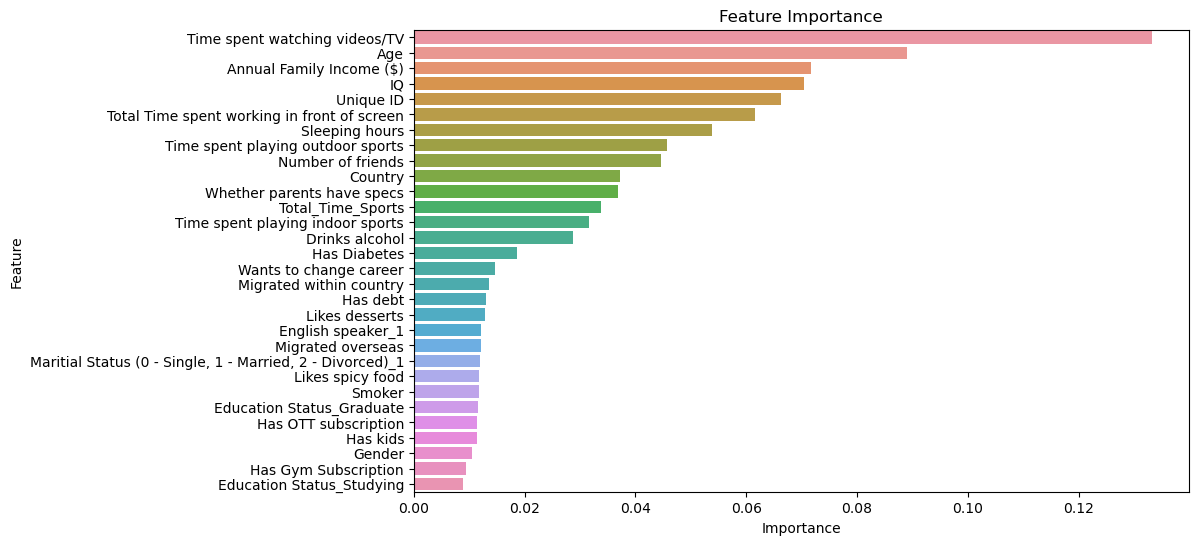

In [53]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

# Final Thoughts
### The steps taken in cleaning, exploring, and understanding the data lay a solid foundation for building a predictive model that can provide actionable insights. By leveraging this data, Dot Glasses can better understand their customers, optimize their offerings, and ultimately drive business growth.